# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/study_results.csv")

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Study data files
group_by_regimen=combined_data.groupby("Drug Regimen")
print(group_by_regimen)
count_group_by_regimen=group_by_regimen.count().head(10)
count_group_by_regimen

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_by_regimen=combined_data.groupby("Drug Regimen")


group_mean = group_by_regimen["Tumor Volume (mm3)"].mean()
group_median = group_by_regimen["Tumor Volume (mm3)"].median()
group_var = group_by_regimen["Tumor Volume (mm3)"].var()
group_sem = group_by_regimen["Tumor Volume (mm3)"].sem()
group_std = group_by_regimen["Tumor Volume (mm3)"].std()


group_analysis=pd.DataFrame({
                        "Tumor Volume Mean (mm3)": group_mean,
                        "Tumor Volume Median(mm3)": group_median,
                        "Tumor Volume VAR(mm3)": group_var,
                        "Tumor Volume STD(mm3)" : group_std,
                        "Tumor Volume SEM(mm3)" : group_sem 
                        })
group_analysis.head(40)

,Tumor Volume Mean (mm3),Tumor Volume Median(mm3),Tumor Volume VAR(mm3),Tumor Volume STD(mm3),Tumor Volume SEM(mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

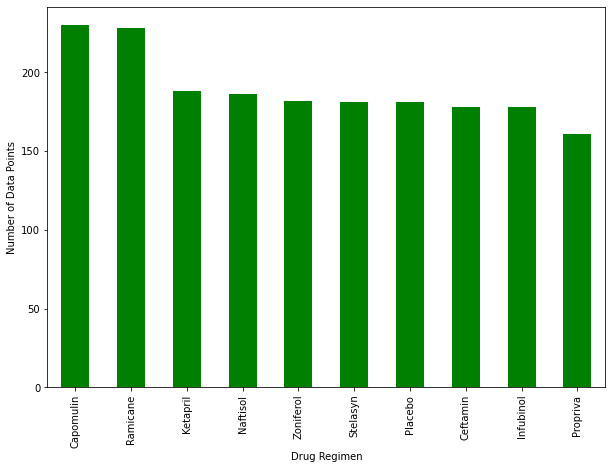

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = combined_data['Drug Regimen'].value_counts()
fig, ax = plt.subplots(figsize=(10,7))
counts.plot(kind="bar", color="g")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()
plt.savefig("images/drug_reg_pandas_barplot.png")


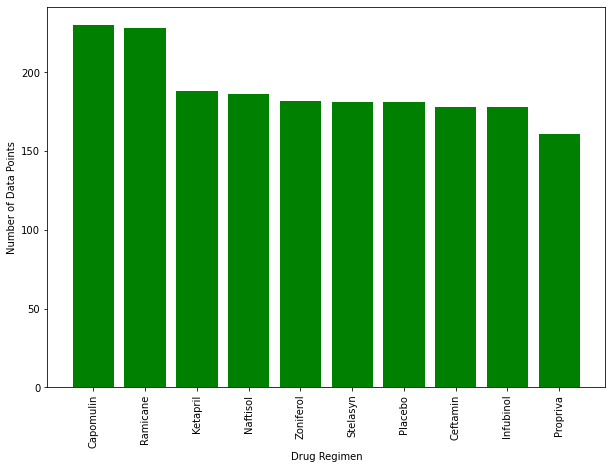

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
counts = combined_data['Drug Regimen'].value_counts()
fig, ax = plt.subplots(figsize=(10,7))
plt.bar(counts.index.values,counts.values, color="g")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()
plt.savefig("images/drug_reg_pyplot_barplot.png")

## Pie plots

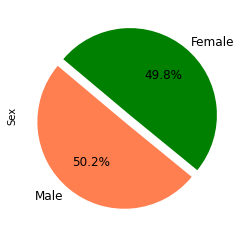

<Figure size 432x288 with 0 Axes>

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# gender_group_by_regimen = combined_data[['Sex','Mouse ID']].groupby(['Sex']).count().reset_index()

counts = mouse_metadata.Sex.value_counts()
labels=mouse_metadata['Sex']
colors = ["coral", "green"]
explode=(0.1,0)
counts.plot(kind="pie",autopct='%1.1f%%', colors=colors, explode=explode, startangle=140, fontsize=12 )
plt.show()
plt.savefig("images/gender_pandas_pieplots.png")

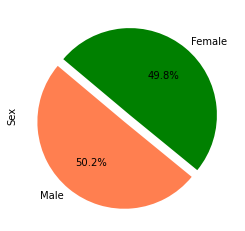

<Figure size 432x288 with 0 Axes>

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = mouse_metadata.Sex.value_counts()
counts
labels=mouse_metadata['Sex']
colors = ["coral", "green"]
explode=(0.1,0)

plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%',colors=colors, explode=explode, startangle=140)
plt.ylabel("Sex")

plt.show()
plt.savefig("images/gender_pyplot_pieplots.png")

# Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = combined_data.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor[['Mouse ID','Timepoint']].merge(combined_data,on=['Mouse ID','Timepoint'],how="left")

capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

# Quantitatively determine capomulin outliers
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [37]:
# Quantitatively determine ramicane outliers
ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < ram_lower_bound) | (ramicane > ram_upper_bound)]}")

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [38]:
# Quantitatively determine infubinol outliers
inf_quartiles = infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Infubinol potential outliers: {infubinol.loc[(infubinol < inf_lower_bound) | (infubinol > inf_upper_bound)]}")

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [39]:
# Quantitatively determine ceftamin outliers
cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin > cef_upper_bound)]}")

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


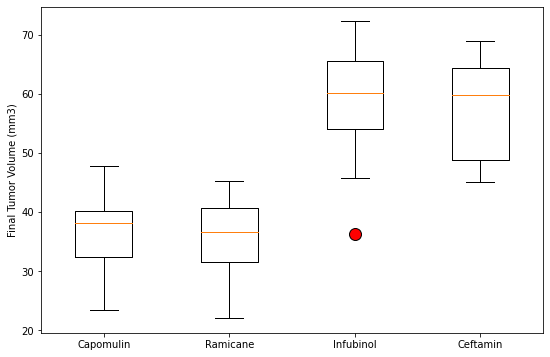

<Figure size 432x288 with 0 Axes>

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure(1, figsize=(9, 6))
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()
plt.savefig("images/boxplots.png")

## Line and scatter plots

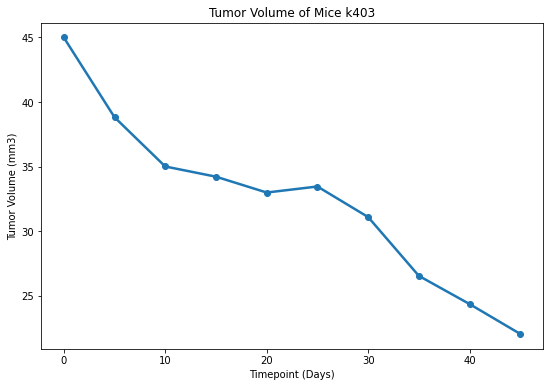

<Figure size 432x288 with 0 Axes>

In [46]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_chart = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin", :]
line_plot = combined_data.loc[combined_data["Mouse ID"] == "k403", :]

fig = plt.figure(1, figsize=(9, 6))
x_axis= line_plot["Timepoint"]
points= line_plot["Tumor Volume (mm3)"]

plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume of Mice k403')

plt.plot(x_axis, points, marker='o', linewidth=2.5)
plt.show()
plt.savefig("images/lineplots.png")

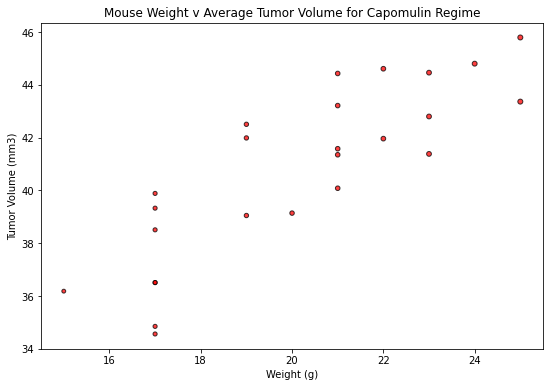

<Figure size 432x288 with 0 Axes>

In [49]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_chart = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin", :]

# use data above to calculate the average of the tumor based on each mouse- mean of the mouse id

capomulin_avg=capomulin_chart.groupby(['Mouse ID']).mean()

fig = plt.figure(1, figsize=(9, 6))
x_axis= capomulin_avg['Weight (g)']
data= capomulin_avg['Tumor Volume (mm3)']

plt.title("Mouse Weight v Average Tumor Volume for Capomulin Regime")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.show()
plt.savefig("images/scatterplots.png")

# Correlation and Regression


The correlation between mouse weight and the average tumor volume is 0.84


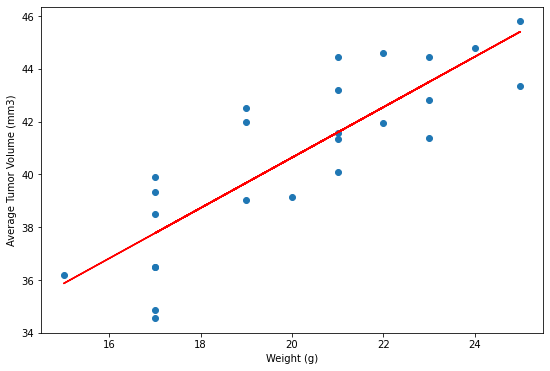

<Figure size 432x288 with 0 Axes>

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
fig = plt.figure(1, figsize=(9, 6))
y_values = capomulin_avg['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
plt.show()
plt.savefig("images/corr.png")